In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
%matplotlib inline

/home/frodos/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [11]:
df = pd.read_csv('glass.csv');
df.head();

In [12]:
features = df.drop('Type', axis = 1);
y = df.Type;

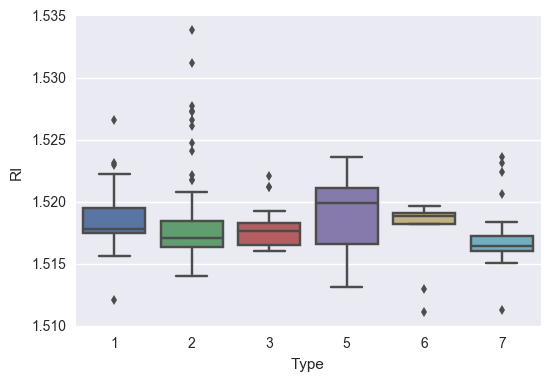

In [13]:
sns.boxplot(y = features.RI,x = y);

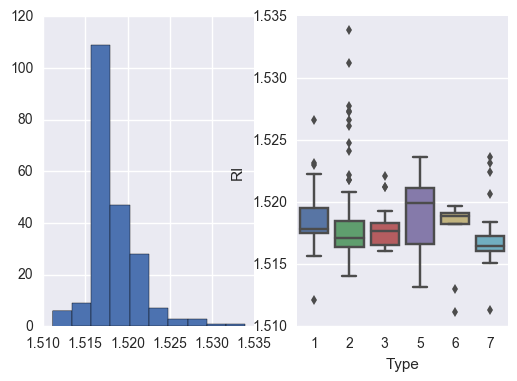

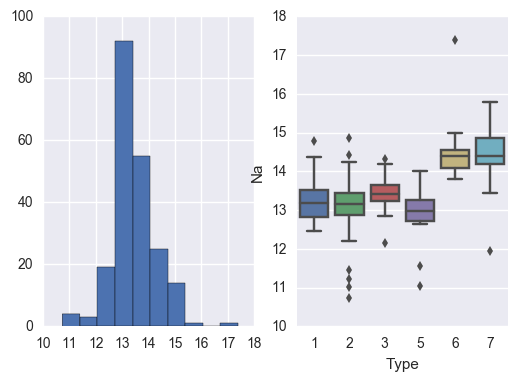

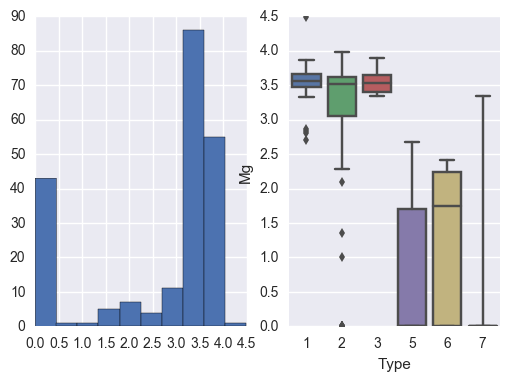

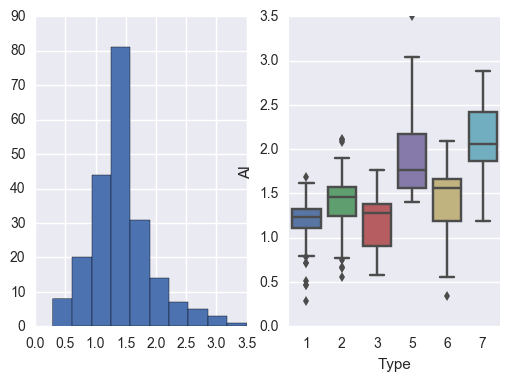

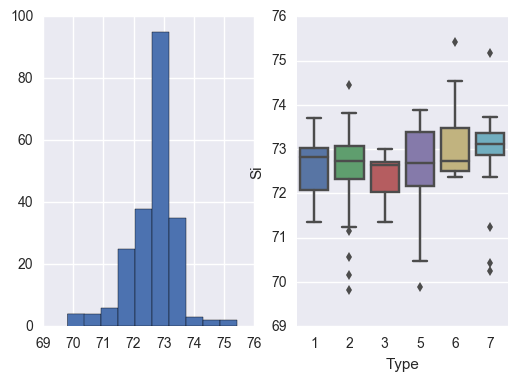

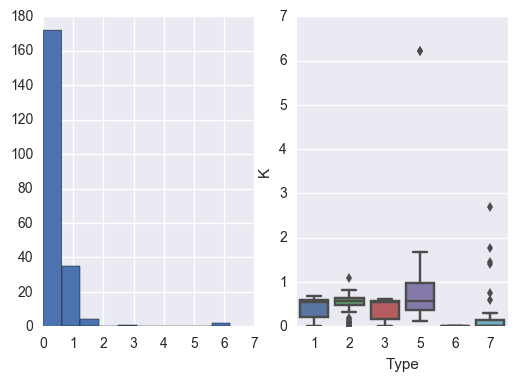

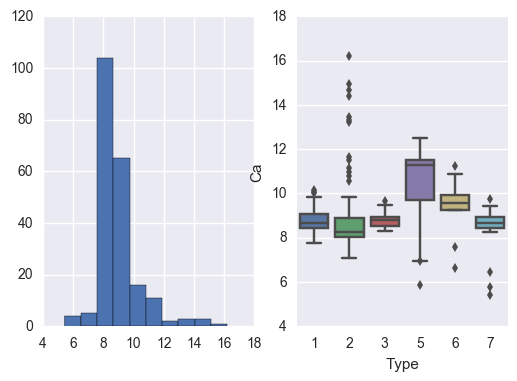

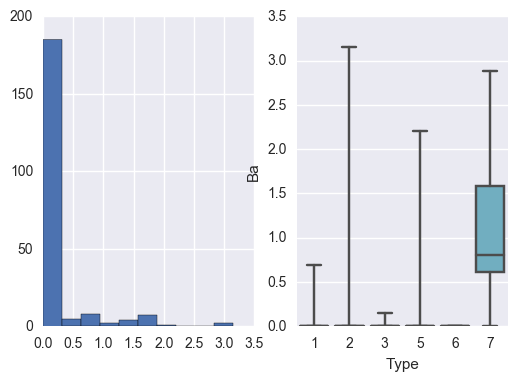

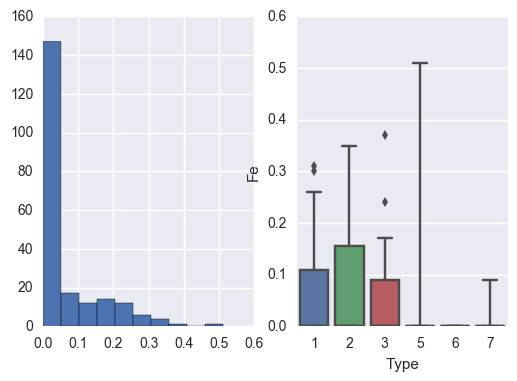

In [14]:
for column in features.columns:
    plt.figure();
    plt.title(column)
    plt.subplot(121);
    plt.hist(features[column],label=y)
    plt.subplot(122);
    sns.boxplot(y = features[column],x = y);

In [ ]:
 sklearn.model_selection.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')[source]

kNN classification

In [20]:
from sklearn.neighbors import KNeighborsClassifier as kNNClass
from sklearn.cross_validation import cross_val_score
# n_neighbors=5, weights='uniform', algorithm='auto',
# leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs
kNN = kNNClass();
CV.cross_val_score(kNN,features, y= y, cv = 5)
# groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')

array([ 0.48888889,  0.63636364,  0.58139535,  0.61904762,  0.725     ])